Este colab fue desarrollado por Arnold Charry Armero.

# Señales de Control

Una señal de control es una medida que evalúa el desempeño de los pronósticos ante los valores reales de la demanda (Heizer & Render, 2004). Las señales de control *positivas* indican que el pronóstico está por encima del valor real de la demanda, y las señales de control *negativas* lo contrario, es decir, que el pronóstico está por debajo del valor real de la demanda. Cuando consistentemente las señales de control están por encima o por debajo de la demanda, se dice que se tiene un **sesgo**, puesto que no se es preciso al pronosticar. Una vez que se obtienen las señales de control, se evalúa que no sobrepasen los límites establecidos por el negocio, ya que si este es el caso, pues se posee un gran error en las predicciones y se debe cambiar el tipo de pronóstico o su procedimiento. Matemáticamente, se calculan así:

$$ \mathrm{Señal \: de \: control} = \frac{\mathrm{Error \: acumulado}}{\mathrm{MAD}} $$


$$ \mathrm{Señal \: de \: control} = \frac{\sum (\mathrm{Demanda \: Real \: del \: periodo \:} i - \mathrm{Demanda \: Pronosticada \: en \: el \: periodo \:}i)}{\mathrm{MAD}} $$

donde,

$$ \mathrm{MAD} = \frac{\sum \begin{vmatrix}
\mathrm{Demanda \: Real} - \mathrm{Valor \: Pronosticado}
\end{vmatrix}}{n} $$

Gráficamente se puede entender así:

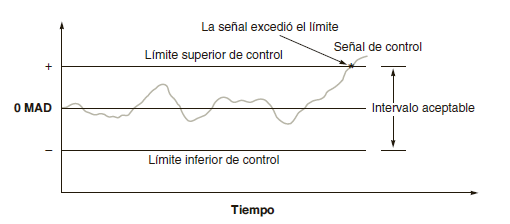

Y ahora se continua con la implementación en código.

In [1]:
#Se importan las librerias
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates

In [2]:
#Conectamos con Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [47]:
#Se ingresa la base de datos
df = pd.read_excel("/content/drive/MyDrive/Operations I/Control_Signs.xlsx")
df.head(36)

,Yt,Yt'
0,80,NaN
1,70,80.000000
2,80,72.500000
3,90,75.625000
4,113,85.781250
5,110,105.525260
6,100,125.419345
7,88,119.711998
8,85,103.284795
9,77,79.075572


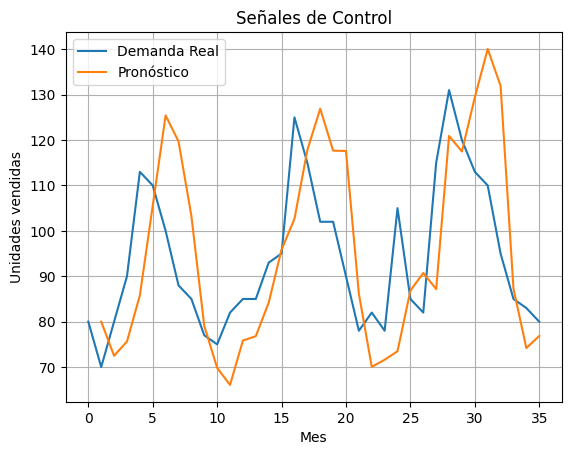

In [48]:
#Graficamos varios de los resultados
plt.plot(df.iloc[:, 0], label = 'Demanda Real')
plt.plot(df.iloc[:, 1], label = 'Pronóstico')
plt.grid()
plt.legend(loc = 'best')
plt.title('Señales de Control')
plt.xlabel("Mes")
plt.ylabel("Unidades vendidas")
plt.show()

In [49]:
#Se calculan los errores normales

errors = []

for i in range(len(df)):
  if i == 0:
    value = np.nan
    errors.append(value)
  else:
    value = df.iloc[i, 0] - df.iloc[i, 1]
    errors.append(value)

df.insert(loc = 2, column = "e", value = errors)
df

,Yt,Yt',e
0,80,NaN,NaN
1,70,80.000000,-10.000000
2,80,72.500000,7.500000
3,90,75.625000,14.375000
4,113,85.781250,27.218750
5,110,105.525260,4.474740
6,100,125.419345,-25.419345
7,88,119.711998,-31.711998
8,85,103.284795,-18.284795
9,77,79.075572,-2.075572


In [50]:
# Se calculan los errores con valor absoluto
absolute_errors = []

for i in range(len(df)):
  if i == 0:
    value = np.nan
    absolute_errors.append(value)
  else:
    value = np.abs(df.iloc[i, 2])
    absolute_errors.append(value)

df.insert(loc = 3, column = "absolute e", value = absolute_errors)
df

,Yt,Yt',e,absolute e
0,80,NaN,NaN,NaN
1,70,80.000000,-10.000000,10.000000
2,80,72.500000,7.500000,7.500000
3,90,75.625000,14.375000,14.375000
4,113,85.781250,27.218750,27.218750
5,110,105.525260,4.474740,4.474740
6,100,125.419345,-25.419345,25.419345
7,88,119.711998,-31.711998,31.711998
8,85,103.284795,-18.284795,18.284795
9,77,79.075572,-2.075572,2.075572


In [51]:
#Se calcula el error acumulado
accumulated_error = []

for i in range(len(df)):
  if i == 0:
    value = np.nan
    accumulated_error.append(value)
  elif i == 1:
    value = df.iloc[i, 2]
    accumulated_error.append(value)
  else:
    value = df.iloc[i, 2] + accumulated_error[i - 1]
    accumulated_error.append(value)

df.insert(loc = 4, column = "SAE", value = accumulated_error)
df

,Yt,Yt',e,absolute e,SAE
0,80,NaN,NaN,NaN,NaN
1,70,80.000000,-10.000000,10.000000,-10.000000
2,80,72.500000,7.500000,7.500000,-2.500000
3,90,75.625000,14.375000,14.375000,11.875000
4,113,85.781250,27.218750,27.218750,39.093750
5,110,105.525260,4.474740,4.474740,43.568490
6,100,125.419345,-25.419345,25.419345,18.149145
7,88,119.711998,-31.711998,31.711998,-13.562853
8,85,103.284795,-18.284795,18.284795,-31.847648
9,77,79.075572,-2.075572,2.075572,-33.923220


In [52]:
#Se calcula el MAD Parcial
Partial_MAD = []
sum = 0

for i in range(len(df)):
  if i == 0:
    Partial_MAD.append(np.nan)
  elif i == 1:
    Partial_MAD.append(df.iloc[i, 3])
  else:
    sum = 0
    cont = 0
    for j in range(1, i + 1):
      sum += df.iloc[j, 3]
      cont += 1
    value = sum / cont
    Partial_MAD.append(value)

df.insert(loc = 5, column = "Partial MAD", value = Partial_MAD)
df

,Yt,Yt',e,absolute e,SAE,Partial MAD
0,80,NaN,NaN,NaN,NaN,NaN
1,70,80.000000,-10.000000,10.000000,-10.000000,10.000000
2,80,72.500000,7.500000,7.500000,-2.500000,8.750000
3,90,75.625000,14.375000,14.375000,11.875000,10.625000
4,113,85.781250,27.218750,27.218750,39.093750,14.773438
5,110,105.525260,4.474740,4.474740,43.568490,12.713698
6,100,125.419345,-25.419345,25.419345,18.149145,14.831306
7,88,119.711998,-31.711998,31.711998,-13.562853,17.242833
8,85,103.284795,-18.284795,18.284795,-31.847648,17.373078
9,77,79.075572,-2.075572,2.075572,-33.923220,15.673356


In [53]:
#Se calculan las señales de control
tracking_signs = []

for i in range(len(df)):
  if i == 0:
    tracking_signs.append(np.nan)
  else:
    value = df.iloc[i, 4] / df.iloc[i, 5]
    tracking_signs.append(value)

df.insert(loc = 6, column = "Tracking Signs", value = tracking_signs)
df

,Yt,Yt',e,absolute e,SAE,Partial MAD,Tracking Signs
0,80,NaN,NaN,NaN,NaN,NaN,NaN
1,70,80.000000,-10.000000,10.000000,-10.000000,10.000000,-1.000000
2,80,72.500000,7.500000,7.500000,-2.500000,8.750000,-0.285714
3,90,75.625000,14.375000,14.375000,11.875000,10.625000,1.117647
4,113,85.781250,27.218750,27.218750,39.093750,14.773438,2.646219
5,110,105.525260,4.474740,4.474740,43.568490,12.713698,3.426894
6,100,125.419345,-25.419345,25.419345,18.149145,14.831306,1.223705
7,88,119.711998,-31.711998,31.711998,-13.562853,17.242833,-0.786579
8,85,103.284795,-18.284795,18.284795,-31.847648,17.373078,-1.833161
9,77,79.075572,-2.075572,2.075572,-33.923220,15.673356,-2.164388


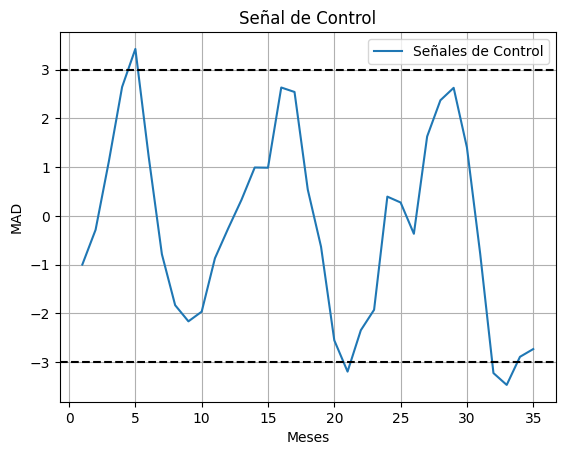

In [59]:
#Graficamos varios de los resultados
plt.plot(df.iloc[:, 6], label = 'Señales de Control')
plt.axhline(y=3, c='black', linestyle = 'dashed')
plt.axhline(y=-3, c='black', linestyle = 'dashed')
plt.grid()
plt.legend(loc = 'best')
plt.title('Señal de Control')
plt.xlabel("Meses")
plt.ylabel("MAD")
plt.show()

### Referencias
*   Heizer, J., & Render, B. (2004). Principios de administración de operaciones.
*   Lind, D. A., Marchal, W. G., & Wathen, S. A. (2005). Estadística aplicada a los negocios y a la economía.